In [1]:
import pandas as pd
file_path = r'C:\Users\ADMIN\Downloads\garments_worker_productivity.csv' 
df=pd.read_csv(file_path)
import matplotlib.pyplot as plt
import seaborn as sns
# Remove leading/trailing spaces in the 'department' column
df['department'] = df['department'].str.strip()

# Get unique values after cleaning
unique_departments = df['department'].unique()

df.head(5)
# Convert 'date' to datetime just in case
df['date'] = pd.to_datetime(df['date'])

# Extract month and day only (to compare mm-dd)
df['mmdd'] = df['date'].dt.strftime('%d-%m')

# Define custom quarters
def assign_custom_quarter(mmdd):
    if '01-01' <= mmdd <= '03-31':
        return 'Q1'
    elif '04-01' <= mmdd <= '06-30':
        return 'Q2'
    elif '07-01' <= mmdd <= '09-30':
        return 'Q3'
    else:
        return 'Q4'

# Apply function to every row
df['quarter'] = df['mmdd'].apply(assign_custom_quarter)

# Optional: Drop mmdd helper column
df.drop(columns=['mmdd'], inplace=True)



# Remove leading/trailing spaces in the 'department' column
df['department'] = df['department'].str.strip()

# Get unique values after cleaning
unique_departments = df['department'].unique()

print(unique_departments)
print(df.columns.tolist())


['sweing' 'finishing']
['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']



Encoded Data:
   team  targeted_productivity    smv  over_time  incentive  idle_time  \
0     8                   0.80  26.16       7080         98        0.0   
1     1                   0.75   3.94        960          0        0.0   
2    11                   0.80  11.41       3660         50        0.0   
3    12                   0.80  11.41       3660         50        0.0   
4     6                   0.80  25.90       1920         50        0.0   

   idle_men  no_of_style_change  no_of_workers  actual_productivity  success  \
0         0                   0           59.0             0.940725  Success   
1         0                   0            8.0             0.886500  Success   
2         0                   0           30.5             0.800570  Success   
3         0                   0           30.5             0.800570  Success   
4         0                   0           56.0             0.800382  Success   

   quarter_Q2  quarter_Q3  quarter_Q4  department_sweing  d

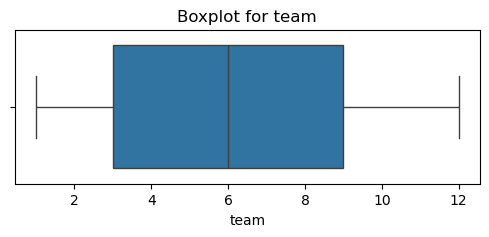

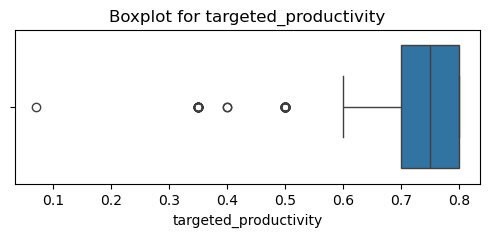

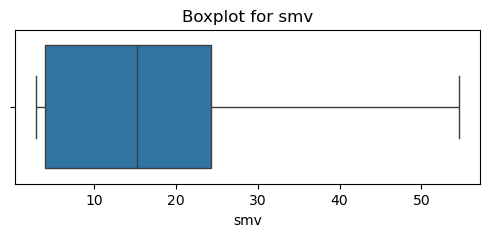

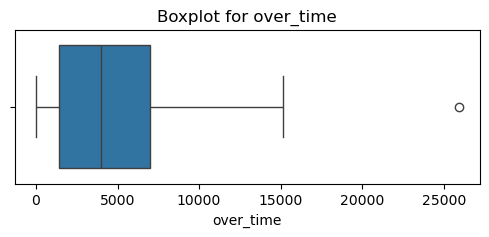

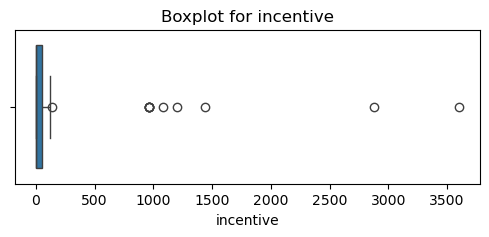

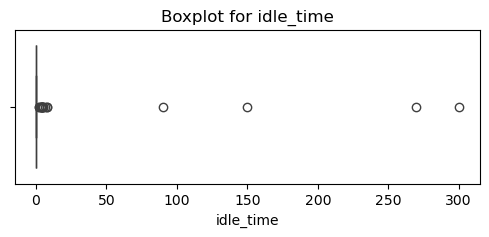

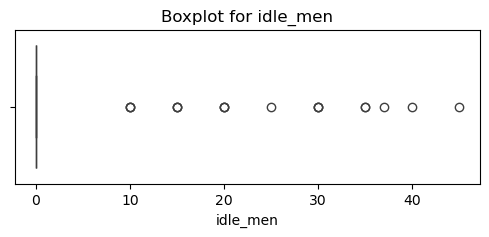

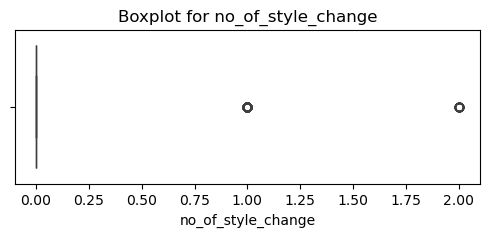

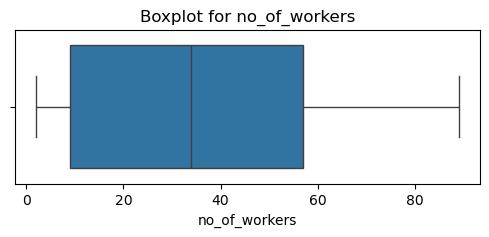

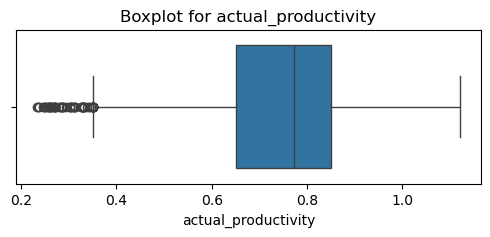


✅ Outliers handled using IQR method — values replaced with **median**.

Before OverSampling, counts of label 'Success': 608
Before OverSampling, counts of label 'Fail': 229
After OverSampling, counts of label 'Success': 608
After OverSampling, counts of label 'Fail': 608


In [2]:
df.drop(['wip'],axis=1 ,inplace =True)
from sklearn.preprocessing import LabelEncoder

# Create 'success' column
df['success'] = df['actual_productivity'] > df['targeted_productivity']
df['success'] = df['success'].apply(lambda x: 'Success' if x else 'Fail')
# Convert categorical variables to numerical values using one-hot encoding
df = df.drop(columns=['date'])
data_encoded = pd.get_dummies(df, columns=['quarter', 'department', 'day'],drop_first=True)
print("\nEncoded Data:")
print(data_encoded.head())
from sklearn.preprocessing import MinMaxScaler

# Step 1: Identify numerical columns
numerical_features = ['team', 'targeted_productivity', 'smv','over_time','incentive',
                      'idle_time','idle_men','no_of_style_change', 'no_of_workers', 'actual_productivity']

# Step 2: Visualize outliers using boxplots (optional)
import seaborn as sns
import matplotlib.pyplot as plt

for feature in numerical_features:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=data_encoded[feature])
    plt.title(f'Boxplot for {feature}')
    plt.show()

# Step 3: Apply IQR and replace outliers with median
for feature in numerical_features:
    Q1 = data_encoded[feature].quantile(0.25)
    Q3 = data_encoded[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_val = data_encoded[feature].median()
    
    # Replace outliers with median
    data_encoded[feature] = data_encoded[feature].apply(
        lambda x: median_val if x < lower_bound or x > upper_bound else x
    )

print("\n✅ Outliers handled using IQR method — values replaced with **median**.\n")
# Split features and target
X = data_encoded.drop(columns=['success'])
y = data_encoded['success']

# Encode target
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

print("Before OverSampling, counts of label 'Success':", sum(y_train == 1))
print("Before OverSampling, counts of label 'Fail':", sum(y_train == 0))
from imblearn.over_sampling import SMOTE
# Apply SMOTE to the training data
sm = SMOTE(random_state=2)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train.ravel())

# Display class distribution after SMOTE
print("After OverSampling, counts of label 'Success': {}".format(sum(y_train_smote == 1)))
print("After OverSampling, counts of label 'Fail': {}".format(sum(y_train_smote == 0)))

Training time (before tuning): 0.0342 seconds
Accuracy: 0.8388888888888889
Confusion Matrix:
[[ 72  27]
 [ 31 230]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.73      0.71        99
           1       0.89      0.88      0.89       261

    accuracy                           0.84       360
   macro avg       0.80      0.80      0.80       360
weighted avg       0.84      0.84      0.84       360



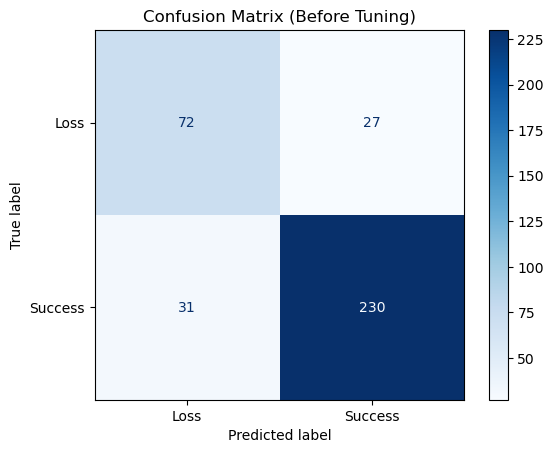

AUC: 0.8855
Training time (after tuning): 1.3509 seconds
Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.85
Confusion Matrix:
[[ 71  28]
 [ 26 235]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.72      0.72        99
           1       0.89      0.90      0.90       261

    accuracy                           0.85       360
   macro avg       0.81      0.81      0.81       360
weighted avg       0.85      0.85      0.85       360



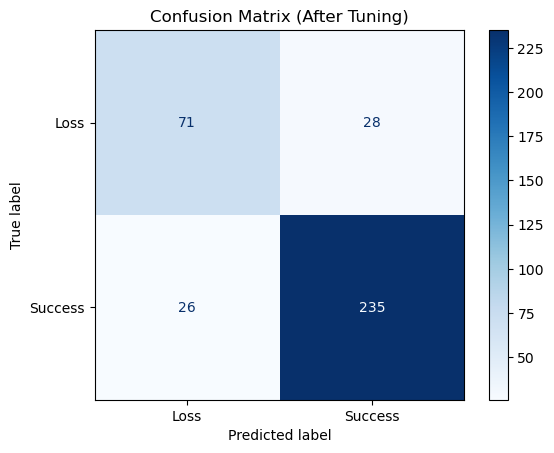

[0.         0.         0.         0.01010101 0.01010101 0.02020202
 0.02020202 0.03030303 0.03030303 0.04040404 0.04040404 0.05050505
 0.05050505 0.06060606 0.06060606 0.07070707 0.07070707 0.08080808
 0.08080808 0.11111111 0.11111111 0.12121212 0.12121212 0.13131313
 0.13131313 0.14141414 0.14141414 0.15151515 0.15151515 0.16161616
 0.16161616 0.17171717 0.17171717 0.18181818 0.18181818 0.19191919
 0.19191919 0.2020202  0.2020202  0.21212121 0.21212121 0.22222222
 0.22222222 0.23232323 0.23232323 0.24242424 0.24242424 0.26262626
 0.26262626 0.27272727 0.27272727 0.28282828 0.28282828 0.29292929
 0.29292929 0.3030303  0.3030303  0.32323232 0.32323232 0.34343434
 0.34343434 0.36363636 0.36363636 0.37373737 0.37373737 0.38383838
 0.38383838 0.4040404  0.4040404  0.44444444 0.44444444 0.46464646
 0.46464646 0.50505051 0.50505051 0.61616162 0.61616162 0.71717172
 0.71717172 0.72727273 0.72727273 0.77777778 0.77777778 1.        ]
[0.         0.00383142 0.27586207 0.27586207 0.37164751 0.371

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

import time
# =================== Logistic Regression BEFORE TUNING =================== #
def logisticRegression(X_train_smote, y_train_smote, X_test, y_test):
    log_reg = LogisticRegression(max_iter=10000, solver='liblinear')

    start_time = time.time()
    log_reg.fit(X_train_smote, y_train_smote)
    end_time = time.time()

    training_time = end_time - start_time
    print(f"Training time (before tuning): {training_time:.4f} seconds")

    y_pred = log_reg.predict(X_test)
    y_prob = log_reg.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"Accuracy: {accuracy}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Loss', 'Success'])
    disp.plot(cmap='Blues', values_format='d')
    plt.title('Confusion Matrix (Before Tuning)')
    plt.show()

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    print(f"AUC: {roc_auc:.4f}")

    return fpr, tpr, roc_auc

# =================== Logistic Regression AFTER TUNING =================== #
def logisticRegression_after_tuning(X_train_smote, y_train_smote, X_test, y_test):
    param_grid = {
        'solver': ['liblinear'],  # removed 'saga'
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10]
    }

    log_reg = LogisticRegression(max_iter=10000)

    start_time = time.time()
    grid_search = GridSearchCV(log_reg, param_grid, cv=5)
    grid_search.fit(X_train_smote, y_train_smote)
    end_time = time.time()

    training_time = end_time - start_time
    print(f"Training time (after tuning): {training_time:.4f} seconds")

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    print(f"Best Parameters: {best_params}")

    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"Accuracy: {accuracy}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Loss', 'Success'])
    disp.plot(cmap='Blues', values_format='d')
    plt.title('Confusion Matrix (After Tuning)')
    plt.show()

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    print(fpr)
    print(tpr)
    print(f"AUC: {roc_auc:.4f}")
    

    # Display coefficients
    coef_df = pd.DataFrame({
        'Feature': X_train_smote.columns,
        'Coefficient': best_model.coef_[0]
    })
    print("\nLogistic Regression Coefficients (After Tuning):")
    print(coef_df)

    print(f"\nIntercept: {best_model.intercept_[0]:.4f}")

    return fpr, tpr, roc_auc

# =================== Run Both =================== #
fpr_lr1, tpr_lr1, auc_lr1 = logisticRegression(X_train_smote, y_train_smote, X_test, y_test)
fpr_lr2, tpr_lr2, auc_lr2 = logisticRegression_after_tuning(X_train_smote, y_train_smote, X_test, y_test)

Training time (before tuning): 0.0223 seconds
Accuracy: 0.8388888888888889
Confusion Matrix:
[[ 72  27]
 [ 31 230]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.73      0.71        99
           1       0.89      0.88      0.89       261

    accuracy                           0.84       360
   macro avg       0.80      0.80      0.80       360
weighted avg       0.84      0.84      0.84       360



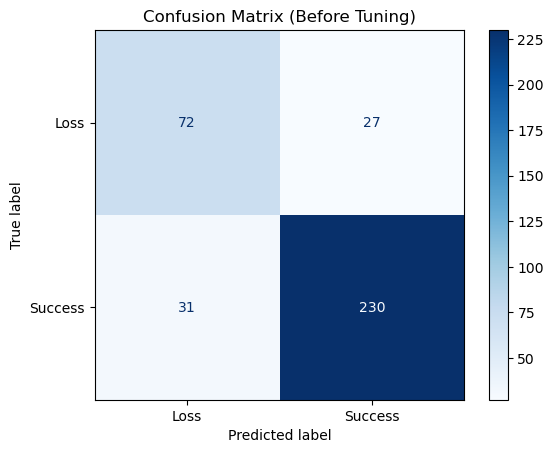

AUC: 0.8855


In [4]:
# =================== Run Both =================== #
fpr_lr1, tpr_lr1, auc_lr1 = logisticRegression(X_train_smote, y_train_smote, X_test, y_test)

Training time (after tuning): 1.2760 seconds
Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.85
Confusion Matrix:
[[ 71  28]
 [ 26 235]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.72      0.72        99
           1       0.89      0.90      0.90       261

    accuracy                           0.85       360
   macro avg       0.81      0.81      0.81       360
weighted avg       0.85      0.85      0.85       360



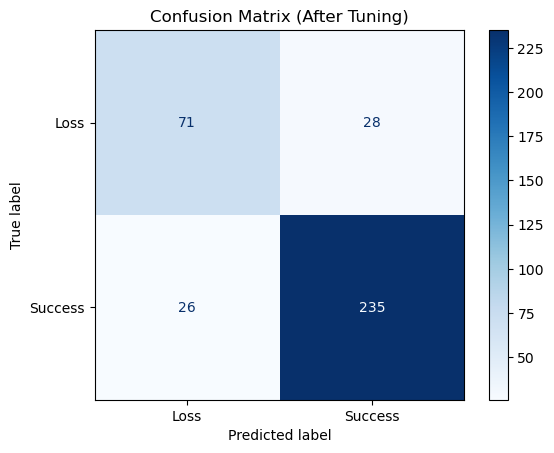

[0.         0.         0.         0.01010101 0.01010101 0.02020202
 0.02020202 0.03030303 0.03030303 0.04040404 0.04040404 0.05050505
 0.05050505 0.06060606 0.06060606 0.07070707 0.07070707 0.08080808
 0.08080808 0.09090909 0.09090909 0.11111111 0.11111111 0.12121212
 0.12121212 0.13131313 0.13131313 0.14141414 0.14141414 0.15151515
 0.15151515 0.16161616 0.16161616 0.17171717 0.17171717 0.18181818
 0.18181818 0.19191919 0.19191919 0.2020202  0.2020202  0.21212121
 0.21212121 0.22222222 0.22222222 0.23232323 0.23232323 0.24242424
 0.24242424 0.26262626 0.26262626 0.27272727 0.27272727 0.28282828
 0.28282828 0.29292929 0.29292929 0.3030303  0.3030303  0.33333333
 0.33333333 0.34343434 0.34343434 0.37373737 0.37373737 0.38383838
 0.38383838 0.4040404  0.4040404  0.44444444 0.44444444 0.46464646
 0.46464646 0.50505051 0.50505051 0.61616162 0.61616162 0.71717172
 0.71717172 0.72727273 0.72727273 0.77777778 0.77777778 1.        ]
[0.         0.00383142 0.27586207 0.27586207 0.37164751 0.371

In [5]:
fpr_lr2, tpr_lr2, auc_lr2 = logisticRegression_after_tuning(X_train_smote, y_train_smote, X_test, y_test)